# Geoguessr game analysis

In [1]:
import atoti as tt

Welcome to atoti 0.5.0.0!

By using this community edition, you agree with the license available at https://www.atoti.io/eula.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [2]:
session = tt.create_session(config="mybinder-config.yml")
session.url

'http://localhost:44263'

## Load the data

In [3]:
scores = session.read_csv("data/scores.csv", keys=["GameId", "Round", "Player"])
games = session.read_csv("data/games.csv",  keys=["GameId"])
rounds = session.read_csv("data/rounds.csv", keys=["GameId", "Round"])
continents = session.read_csv("data/continents.csv", keys=["Country"], sep=",")
scores.join(games, mapping={"GameId": "GameId"})
scores.join(rounds, mapping={"GameId": "GameId", "Round": "Round"})
rounds.join(continents, mapping={"Country": "Country"})

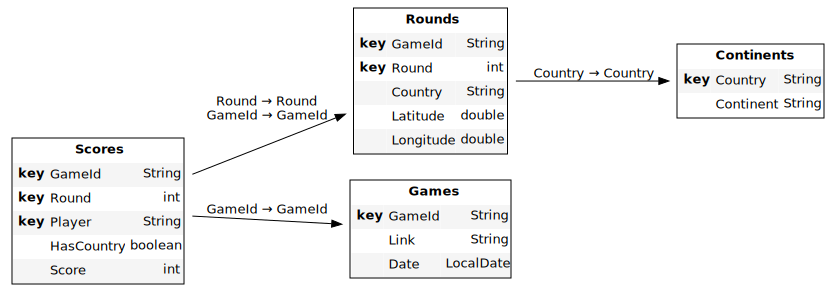

In [4]:
session.stores.schema

## Hierarchy structure

In [5]:
cube = session.create_cube(scores)

In [6]:
m, lvl, h = cube.measures, cube.levels, cube.hierarchies

In [7]:
cube.query()

,Latitude.VALUE,Longitude.VALUE,contributors.COUNT
0,<NA>,<NA>,240


In [8]:
h["Games"] = [scores["GameId"], scores["Round"]]
del h["GameId"]
del h["Round"]

In [9]:
h["Geography"] = [continents["Continent"], rounds["Country"]]
del h["Continent"]
del h["Country"]


In [10]:
h["Geography"].dimension = "Geography"

In [11]:
h

Hierarchies()

## New measures

In [12]:
m["score"] = tt.agg.mean(
    tt.agg.sum(scores["Score"]),
    scope=tt.scope.origin(lvl["Player"], lvl["GameId"])
)
m["score"].formatter = "DOUBLE[#,###]"

In [13]:
m["avg score"] = tt.agg.mean(scores["Score"])

In [14]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [15]:
session.visualize("Average Score per country")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [16]:
session.visualize("Average Score per continent")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [17]:
m["one"] = 1
m["Number of rounds"] = tt.agg.sum(m["one"], scope=tt.scope.origin(lvl["Round"]))

In [18]:
session.visualize("Most seen countries")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [19]:
session.visualize("Most seen continent")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.

In [20]:
m["find country rate"] = tt.filter(m["contributors.COUNT"], lvl["HasCountry"] == True) / m["contributors.COUNT"]
m["find country rate"].formatter = "DOUBLE[0.00%]"

In [21]:
session.visualize("Find country rate per user")

Open the notebook in JupyterLab with the atoti extension installed and enabled to start editing this widget.